<a href="https://colab.research.google.com/github/suozzi-matt/housingMktDataViz/blob/main/CS_Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
from google.colab import drive
drive.mount('/content/drive') #authorization code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Web Scraper

In [ ]:
# HUD Data
# HUD Site: https://hudgis-hud.opendata.arcgis.com/datasets/location-affordability-index-v-3/data?geometry=107.191%2C-0.614%2C-106.559%2C76.538&orderBy=CNTY_FIPS
# Geoservice API: 'https://services.arcgis.com/VTyQ9soqVukalItT/arcgis/rest/services/Location_Affordability_Index_v3/FeatureServer/0/query?outFields=*&where=1%3D1'
'''
url = 'https://hudgis-hud.opendata.arcgis.com/datasets/location-affordability-index-v-3/data?geometry=107.191%2C-0.614%2C-106.559%2C76.538&orderBy=CNTY_FIPS'
page = requests.get(url)
html = page.content
soup = BeautifulSoup(html, "html.parser")
table = soup.find('table', class_ = 'table table-striped table-bordered table-hover') # find just the table
#print(table.prettify()) # don't need to print the table with tags due to length
table_body = soup.find('tbody')
list_of_rows = []
for row in table.findAll('tr'): # table rows are created by the <tr> tag
  list_of_cells = []
  for cell in row.findAll('td'): # table cells are created by the <td> tag
    text = cell.text.replace('&nbsp;','')
    list_of_cells.append(text)
  list_of_rows.append(list_of_cells)
'''

'\nurl = \'https://hudgis-hud.opendata.arcgis.com/datasets/location-affordability-index-v-3/data?geometry=107.191%2C-0.614%2C-106.559%2C76.538&orderBy=CNTY_FIPS\'\npage = requests.get(url)\nhtml = page.content\nsoup = BeautifulSoup(html, "html.parser")\ntable = soup.find(\'table\', class_ = \'table table-striped table-bordered table-hover\') # find just the table\n#print(table.prettify()) # don\'t need to print the table with tags due to length\ntable_body = soup.find(\'tbody\')\nlist_of_rows = []\nfor row in table.findAll(\'tr\'): # table rows are created by the <tr> tag\n  list_of_cells = []\n  for cell in row.findAll(\'td\'): # table cells are created by the <td> tag\n    text = cell.text.replace(\'&nbsp;\',\'\')\n    list_of_cells.append(text)\n  list_of_rows.append(list_of_cells)\n'

In [ ]:
'''
table_header = soup.find('thead')
list_of_column_ids = []
for cell in table_header.findAll('th'):
  text = cell.text.replace('&nbsp;','')
  list_of_column_ids.append(text)
print(list_of_column_ids)
'''

"\ntable_header = soup.find('thead')\nlist_of_column_ids = []\nfor cell in table_header.findAll('th'):\n  text = cell.text.replace('&nbsp;','')\n  list_of_column_ids.append(text)\nprint(list_of_column_ids)\n"

In [ ]:
# Write the csv file
'''
with open("HUD_data.csv", "w", newline='') as f:
  writer = csv.writer(f)
  # Add column names to the file
  #writer.writerow(list_of_column_ids)
  # Add data to the file
  writer.writerows(list_of_rows)
'''

## Read in Data

In [4]:
# Read in data as pandas dataframe
# https://services.arcgis.com/VTyQ9soqVukalItT/arcgis/rest/services/LAIv1/FeatureServer/0/query?outFields=*&where=1%3D1
file = '/content/drive/MyDrive/HUD_data.csv'
data = pd.read_csv(file)
data = data.rename(columns={'FID': 'Object_ID', 'BlockGroups_GEOID10': '2010_Census_Geoid', 'BlockGroups_STATEFP10': 'State_ID', 'BlockGroups_COUNTYFP10': 'County_ID', 'SF1_BlockGroups_NAME': 'Name','SF1_BlockGroups_STATE_NAME': 'State', 'SF1_BlockGroups_ST_ABBREV': 'State_ABBREV'})
data = data.drop(data.columns[4:6], axis=1)

#filter for NaN 
# combine state & county ID 
data["State_County_ID"]=data["State_ID"].astype(str) + data["County_ID"].astype(str)
data["State_County_ID"] = pd.to_numeric(data["State_County_ID"], downcast='integer')
# Translate GeoID into label for metro areas

#check output
print(data.dtypes)
data.head()

Object_ID                   int64
2010_Census_Geoid           int64
State_ID                    int64
County_ID                   int64
Name                      float64
                           ...   
hh_type8_vmt              float64
hh_type8_transit_trips    float64
SHAPE_Length              float64
SHAPE_Area                float64
State_County_ID             int32
Length: 122, dtype: object


,Object_ID,2010_Census_Geoid,State_ID,County_ID,Name,State,State_ABBREV,residential_density,gross_hh_density,block_denstiy,intersection_density,employment_access_index,job_diversity_index,average_median_commute_distance,per_capita_income,hh_type1_income,hh_type1_size,hh_type1_workers,hh_type1_ht,hh_type1_h,hh_type1_ht_own,hh_type1_h_own,hh_type1_ht_rent,hh_type1_h_rent,hh_type1_t,hh_type1_autos,hh_type1_vmt,hh_type1_transit_trips,hh_type2_income,hh_type2_size,hh_type2_workers,hh_type2_ht,hh_type2_h,hh_type2_ht_own,hh_type2_h_own,hh_type2_ht_rent,hh_type2_h_rent,hh_type2_t,hh_type2_autos,hh_type2_vmt,...,hh_type6_workers,hh_type6_ht,hh_type6_h,hh_type6_ht_own,hh_type6_h_own,hh_type6_ht_rent,hh_type6_h_rent,hh_type6_t,hh_type6_autos,hh_type6_vmt,hh_type6_transit_trips,hh_type7_income,hh_type7_size,hh_type7_workers,hh_type7_ht,hh_type7_h,hh_type7_ht_own,hh_type7_h_own,hh_type7_ht_rent,hh_type7_h_rent,hh_type7_t,hh_type7_autos,hh_type7_vmt,hh_type7_transit_trips,hh_type8_income,hh_type8_size,hh_type8_workers,hh_type8_ht,hh_type8_h,hh_type8_ht_own,hh_type8_h_own,hh_type8_ht_rent,hh_type8_h_rent,hh_type8_t,hh_type8_autos,hh_type8_vmt,hh_type8_transit_trips,SHAPE_Length,SHAPE_Area,State_County_ID
0,1,10010201001,1,1,1.001020e+07,Alabama,AL,1.18074,0.22802,0.02481,0.06774,4039.64242,2377.12702,13.4872,25018.34061,46404.0,2.52,1.07612,58.49384,32.97585,64.26989,38.75191,38.22315,12.70516,25.51798,1.91696,25679.36294,3.79043,37123.2,2.52,1.07612,67.83037,37.93335,74.41004,44.51303,44.73943,14.84241,29.89702,1.83041,25129.53132,...,1.0,65.84365,42.12278,74.12964,50.40877,36.76451,13.04364,23.72087,1.48909,18962.28825,3.88963,18414.28571,1.0,1.0,106.67727,64.25599,118.96241,76.54113,63.56339,21.14211,42.42128,1.33630,17901.04557,4.60947,37123.2,2.0,0.0,64.19630,41.30819,72.03960,49.15149,36.67075,13.78264,22.88811,1.47285,18033.52446,2.03141,0.110807,0.000410,11
1,2,10010201002,1,1,1.001020e+07,Alabama,AL,1.18649,0.33213,0.02253,0.05015,3151.21613,2469.12451,16.5752,25540.21739,46404.0,2.52,1.07612,50.84112,25.33012,51.20694,25.69594,47.49186,21.98086,25.51100,1.90654,25851.33811,2.70818,37123.2,2.52,1.07612,59.20424,29.31120,59.40468,29.51164,57.36912,27.47608,29.89304,1.81999,25300.90755,...,1.0,56.64444,32.85011,57.20740,33.41308,51.49021,27.69589,23.79432,1.47966,19261.54225,2.58472,18414.28571,1.0,1.0,93.75684,51.17196,93.29594,50.71105,97.97666,55.39178,42.58489,1.32686,18198.43911,3.30700,37123.2,2.0,0.0,55.05128,32.00229,55.54565,32.49666,50.52507,27.47608,23.04899,1.47482,18307.12430,0.00000,0.096808,0.000534,11
2,3,10010202001,1,1,1.001020e+07,Alabama,AL,1.45205,0.78051,0.02949,0.11993,4415.57319,2349.56864,15.7593,11964.35045,46404.0,2.52,1.07612,56.56345,32.14654,68.14667,43.72976,37.07546,12.65854,24.41691,1.84491,24379.70202,4.28453,37123.2,2.52,1.07612,65.60291,37.03088,78.83081,50.25878,43.34787,14.77584,28.57203,1.76013,23831.02208,...,1.0,63.15488,40.49510,79.48494,56.82516,35.68066,13.02089,22.65978,1.41530,18233.62731,4.31585,18414.28571,1.0,1.0,102.52297,62.05880,126.89674,86.43257,61.51575,21.05158,40.46417,1.26798,17175.96205,5.14395,37123.2,2.0,0.0,60.99275,39.51995,76.38606,54.91326,35.09455,13.62175,21.47280,1.38761,16822.02776,1.09044,0.062129,0.000197,11
3,4,10010202002,1,1,1.001020e+07,Alabama,AL,1.37288,1.05108,0.11679,0.19570,5384.02395,2330.26313,12.0583,19640.09434,46404.0,2.52,1.07612,47.86888,24.25007,53.38349,29.76468,40.54178,16.92296,23.61881,1.81002,23127.89339,5.19053,37123.2,2.52,1.07612,55.62868,28.02322,61.86410,34.25864,47.34385,19.73839,27.60546,1.72600,22592.97437,...,1.0,51.32660,29.60049,60.46524,38.73913,39.18435,17.45824,21.72611,1.37532,17169.36431,5.47280,18414.28571,1.0,1.0,87.16859,48.46458,97.89510,59.19109,72.91658,34.21257,38.70401,1.23040,16154.44438,6.27060,37123.2,2.0,0.0,49.63211,29.41685,57.55352,37.33826,39.10716,18.89190,20.21526,1.33315,15372.06680,5.67717,0.052277,0.000124,11
4,5,10010203001,1,1,1.001020e+07,Alabama,AL,1.05234,0.96919,0.02303,0.09838,4743.36174,2359.30268,1

Q1. Are neighborhoods with high income associated with population density, employment access, commute distance?

Q2. What states/regions have the largest gap between low and high income profiles?

In [7]:
# highest income neighborhood
data.sort_values("per_capita_income", ascending=False).head(25)

,Object_ID,2010_Census_Geoid,State_ID,County_ID,Name,State,State_ABBREV,residential_density,gross_hh_density,block_denstiy,intersection_density,employment_access_index,job_diversity_index,average_median_commute_distance,per_capita_income,hh_type1_income,hh_type1_size,hh_type1_workers,hh_type1_ht,hh_type1_h,hh_type1_ht_own,hh_type1_h_own,hh_type1_ht_rent,hh_type1_h_rent,hh_type1_t,hh_type1_autos,hh_type1_vmt,hh_type1_transit_trips,hh_type2_income,hh_type2_size,hh_type2_workers,hh_type2_ht,hh_type2_h,hh_type2_ht_own,hh_type2_h_own,hh_type2_ht_rent,hh_type2_h_rent,hh_type2_t,hh_type2_autos,hh_type2_vmt,...,hh_type6_workers,hh_type6_ht,hh_type6_h,hh_type6_ht_own,hh_type6_h_own,hh_type6_ht_rent,hh_type6_h_rent,hh_type6_t,hh_type6_autos,hh_type6_vmt,hh_type6_transit_trips,hh_type7_income,hh_type7_size,hh_type7_workers,hh_type7_ht,hh_type7_h,hh_type7_ht_own,hh_type7_h_own,hh_type7_ht_rent,hh_type7_h_rent,hh_type7_t,hh_type7_autos,hh_type7_vmt,hh_type7_transit_trips,hh_type8_income,hh_type8_size,hh_type8_workers,hh_type8_ht,hh_type8_h,hh_type8_ht_own,hh_type8_h_own,hh_type8_ht_rent,hh_type8_h_rent,hh_type8_t,hh_type8_autos,hh_type8_vmt,hh_type8_transit_trips,SHAPE_Length,SHAPE_Area,State_County_ID
48697,48698,120990035041,12,99,1.209900e+08,Florida,FL,1.22744,0.57627,0.05846,0.11275,2.104539e+04,2039.80551,2.87220,157233.33333,48839.0,2.66,1.16571,87.83812,65.91025,101.78208,79.85421,51.58383,29.65596,21.92787,1.84069,20413.80261,21.15845,39071.2,2.66,1.16571,107.23097,81.68847,125.36027,99.81777,60.09480,34.55230,25.54250,1.75581,19855.37751,...,1.0,106.90070,86.91654,126.19027,106.20611,56.74782,36.76365,19.98417,1.32661,13983.22328,27.11790,18360.52632,1.0,1.0,209.05760,173.83307,247.63674,212.41221,108.75183,73.52730,35.22453,1.18760,12943.17327,28.43333,39071.2,2.0,0.0,99.31570,81.68847,117.44500,99.81777,52.17954,34.55230,17.62723,1.28640,12318.86168,61.94509,0.228682,0.000264,1299
45467,45468,120710802032,12,71,1.207108e+08,Florida,FL,1.28180,1.02218,0.01319,0.12530,2.024636e+03,2961.27839,11.51710,148610.86957,50014.0,2.44,0.95361,101.40671,77.97817,101.40671,77.97817,46.30168,22.87313,23.42855,1.88341,24652.62307,0.00000,40011.2,2.44,0.95361,125.73516,97.47271,125.73516,97.47271,54.95974,26.69729,28.26245,1.79906,24108.34090,...,1.0,117.82721,95.13336,117.82721,95.13336,45.86693,23.17308,22.69385,1.49430,19591.53943,0.00000,20497.54098,1.0,1.0,230.80342,190.26673,230.80342,190.26673,77.99467,37.45798,40.53670,1.34331,18519.57259,0.00000,40011.2,2.0,0.0,119.70757,97.47271,119.70757,97.47271,46.97408,24.73922,22.23486,1.48729,17737.21727,0.00000,0.070063,0.000056,1271
135541,135542,360610114012,36,61,3.606101e+08,New York,NY,18.86742,18.86744,0.32956,0.82391,1.183129e+06,1831.89117,1.45680,147929.58580,63915.0,2.69,1.20119,33.80061,24.76874,41.88801,32.85614,29.02680,19.99493,9.03188,0.82409,7431.88118,1081.06081,51132.0,2.69,1.20119,40.05513,29.75795,51.36736,41.07017,33.37778,23.08059,10.29719,0.75105,6897.10115,...,1.0,37.23143,31.01772,50.40522,44.19150,29.45524,23.24153,6.21371,0.35884,3692.98031,840.47952,23760.22305,1.0,1.0,69.75651,59.80051,98.33901,88.38301,52.88489,42.92889,9.95600,0.25840,2736.47472,850.30194,51132.0,2.0,0.0,36.94429,28.15817,49.85630,41.07017,29.32262,20.53649,8.78612,0.61110,5167.37378,1154.98514,0.009672,0.000005,3661
46688,46689,120860040006,12,86,1.208600e+08,Florida,FL,3.14868,2.58035,0.16514,0.20643,3.747828e+04,3754.23053,5.32537,136931.44654,48839.0,2.66,1.16571,72.60768,55.28369,72.60768,55.28369,37.68362,20.35963,17.32399,1.51094,14458.30190,207.52779,39071.2,2.66,1.16571,89.07756,69.10461,89.07756,69.10461,43.72528,23.75233,19.97295,1.42914,13913.19858,...,1.0,88.25379,73.52730,88.25379,73.52730,36.72670,22.00022,14.72648,1.03478,8831.79246,168.68656,18360.52632,1.0,1.0,172.18241,147.05461,172.18241,147.05461,60.63781,35.51000,25.12781,0.90530,7833.12367,171.02352,39071.2,2.0,0.0,83.15412,69.10461,83.15412,69.10461,36.80935,22.75984,14.04951,1.10828,7833.73449,223.78541,0.017993,0.000018,

In [ ]:
# lowest income neighborhoods
data.sort_values("per_capita_income", ascending=True).head(25)

,Object_ID,2010_Census_Geoid,State_ID,County_ID,Name,State,State_ABBREV,residential_density,gross_hh_density,block_denstiy,intersection_density,employment_access_index,job_diversity_index,average_median_commute_distance,per_capita_income,hh_type1_income,hh_type1_size,hh_type1_workers,hh_type1_ht,hh_type1_h,hh_type1_ht_own,hh_type1_h_own,hh_type1_ht_rent,hh_type1_h_rent,hh_type1_t,hh_type1_autos,hh_type1_vmt,hh_type1_transit_trips,hh_type2_income,hh_type2_size,hh_type2_workers,hh_type2_ht,hh_type2_h,hh_type2_ht_own,hh_type2_h_own,hh_type2_ht_rent,hh_type2_h_rent,hh_type2_t,hh_type2_autos,hh_type2_vmt,...,hh_type6_size,hh_type6_workers,hh_type6_ht,hh_type6_h,hh_type6_ht_own,hh_type6_h_own,hh_type6_ht_rent,hh_type6_h_rent,hh_type6_t,hh_type6_autos,hh_type6_vmt,hh_type6_transit_trips,hh_type7_income,hh_type7_size,hh_type7_workers,hh_type7_ht,hh_type7_h,hh_type7_ht_own,hh_type7_h_own,hh_type7_ht_rent,hh_type7_h_rent,hh_type7_t,hh_type7_autos,hh_type7_vmt,hh_type7_transit_trips,hh_type8_income,hh_type8_size,hh_type8_workers,hh_type8_ht,hh_type8_h,hh_type8_ht_own,hh_type8_h_own,hh_type8_ht_rent,hh_type8_h_rent,hh_type8_t,hh_type8_autos,hh_type8_vmt,hh_type8_transit_trips,SHAPE_Length,SHAPE_Area
193547,193548,483090004001,48,309,4.830900e+08,Texas,TX,1.05920,0.65776,0.18356,0.43595,25174.02745,3388.25094,46.06410,342.32877,40672.0,2.68,1.15959,34.42726,9.38792,64.00775,38.96842,34.42726,9.38792,25.03934,1.74034,20455.36966,32.01716,32537.6,2.68,1.15959,40.15434,11.01774,74.11140,44.97480,40.15434,11.01774,29.13660,1.65560,19909.88316,...,1.0,1.0,32.19182,9.89135,75.63170,53.33123,32.19182,9.89135,22.30047,1.24983,13052.38298,26.68329,15176.11940,1.0,1.0,55.34097,16.26349,121.25949,82.18201,55.34097,16.26349,39.07748,1.11245,12059.26098,27.20357,32537.6,2.0,0.0,30.00633,11.17056,68.64830,49.81253,30.00633,11.17056,18.83577,1.18043,10997.13910,22.35726,0.031041,0.000050
160035,160036,401091030002,40,109,4.010910e+08,Oklahoma,OK,2.25898,0.86376,0.13087,0.49731,65759.31205,2619.43011,5.26597,490.96267,46999.0,2.53,1.15972,43.65405,23.97964,50.21638,30.54197,38.18544,18.51103,19.67441,1.66227,16742.91447,20.47669,37599.2,2.53,1.15972,51.42571,28.62179,58.00531,35.20140,45.94270,23.13879,22.80391,1.58272,16208.50090,...,1.0,1.0,47.55757,30.98697,56.64219,40.07159,39.98705,23.41646,16.57059,1.18864,10760.88339,18.43408,18576.67984,1.0,1.0,82.21511,53.49415,90.20860,61.48765,75.55387,46.83291,28.72096,1.05821,9750.99744,18.93817,37599.2,2.0,0.0,44.67586,30.20418,53.15433,38.68264,37.61048,23.13879,14.47169,1.10115,8629.74108,28.52958,0.019195,0.000015
130790,130791,360299401001,36,29,3.602994e+08,New York,NY,0.00000,0.00340,0.00340,0.00425,2866.01410,2220.97425,20.47880,526.10526,47093.0,2.37,1.05489,63.37323,31.74547,63.37323,31.74547,46.48234,14.85458,31.62775,2.22304,32530.89596,14.74289,37674.4,2.37,1.05489,73.71146,36.34235,73.71146,36.34235,54.79237,17.42325,37.36912,2.13344,31990.03556,...,1.0,1.0,68.43331,39.79363,68.43331,39.79363,43.07529,14.43562,28.63968,1.82662,24279.94958,14.15568,19870.46414,1.0,1.0,111.80624,59.79408,111.80624,59.79408,75.70428,23.69212,52.01216,1.65488,23193.76626,14.15568,37674.4,2.0,0.0,71.80337,41.35843,71.80337,41.35843,47.55517,17.11023,30.44493,1.83498,24608.54443,3.45705,0.118855,0.000526
159237,159238,400310024032,40,31,4.003100e+08,Oklahoma,OK,0.39441,0.02690,0.04322,0.08644,2789.32851,2766.83137,99.00370,556.57016,44012.0,2.48,1.06712,50.59915,20.01498,57.56527,26.98110,50.59915,20.01498,30.58417,1.99610,31572.88803,62.53395,35209.6,2.48,1.06712,59.51133,23.35270,67.23676,31.07813,59.51133,23.35270,36.15863,1.91626,31054.33441,...,1.0,1.0,52.91897,22.22014,64.05225,33.35342,52.91897,22.22014,30.69883,1.73697,24931.92621,61.91929,17746.77419,1.0,1.0,92.34835,35.87667,108.67287,52.20118,92.34835,35.87667,56.47169,1.57948,24309.76593,63.47211,35209.6,2.0,0.0,51.30388,25.34040,61.18388,35.22040,51.30388,25.34040,25.96347,1.51041,19806.92196,98.73891,0.181233,0.000902
39494,39495,90138812001,9,13,9.01388

In [12]:
# highest residential density neighborhoods
data.sort_values("residential_density",ascending=False).head(25)

,Object_ID,2010_Census_Geoid,State_ID,County_ID,Name,State,State_ABBREV,residential_density,gross_hh_density,block_denstiy,intersection_density,employment_access_index,job_diversity_index,average_median_commute_distance,per_capita_income,hh_type1_income,hh_type1_size,hh_type1_workers,hh_type1_ht,hh_type1_h,hh_type1_ht_own,hh_type1_h_own,hh_type1_ht_rent,hh_type1_h_rent,hh_type1_t,hh_type1_autos,hh_type1_vmt,hh_type1_transit_trips,hh_type2_income,hh_type2_size,hh_type2_workers,hh_type2_ht,hh_type2_h,hh_type2_ht_own,hh_type2_h_own,hh_type2_ht_rent,hh_type2_h_rent,hh_type2_t,hh_type2_autos,hh_type2_vmt,...,hh_type6_workers,hh_type6_ht,hh_type6_h,hh_type6_ht_own,hh_type6_h_own,hh_type6_ht_rent,hh_type6_h_rent,hh_type6_t,hh_type6_autos,hh_type6_vmt,hh_type6_transit_trips,hh_type7_income,hh_type7_size,hh_type7_workers,hh_type7_ht,hh_type7_h,hh_type7_ht_own,hh_type7_h_own,hh_type7_ht_rent,hh_type7_h_rent,hh_type7_t,hh_type7_autos,hh_type7_vmt,hh_type7_transit_trips,hh_type8_income,hh_type8_size,hh_type8_workers,hh_type8_ht,hh_type8_h,hh_type8_ht_own,hh_type8_h_own,hh_type8_ht_rent,hh_type8_h_rent,hh_type8_t,hh_type8_autos,hh_type8_vmt,hh_type8_transit_trips,SHAPE_Length,SHAPE_Area,State_County_ID
59970,59971,170310307022,17,31,1.703103e+08,Illinois,IL,1635.34506,390.51257,1.98230,0.99115,6.887943e+04,2787.64219,6.98017,40579.01235,60574.0,2.70,1.21097,29.24915,23.42113,29.57101,23.74299,27.64962,21.82159,5.82803,0.00000,8596.51550,1439.84006,48459.2,2.70,1.21097,34.52504,27.43834,34.95046,27.86375,32.41084,25.32413,7.08670,0.00000,8128.14947,...,1.0,36.92912,30.46766,37.49145,31.02999,34.13451,27.67305,6.46146,0.00000,6691.20784,1251.01750,22434.81481,1.0,1.0,61.94614,49.66263,63.09739,50.81388,56.22478,43.94127,12.28351,0.00000,5944.35586,1265.47993,48459.2,2.0,0.0,35.85995,26.66254,37.70363,28.50622,26.69742,17.50001,9.19741,0.04257,12379.96502,1408.26520,0.002923,4.435515e-07,1731
45017,45018,120710012012,12,71,1.207100e+08,Florida,FL,1413.87784,0.11665,0.01304,0.03431,1.075926e+04,2497.80908,6.02757,31365.15152,50014.0,2.44,0.95361,30.49065,17.39513,49.13844,36.04292,30.49065,17.39513,13.09552,0.85812,16360.63156,266.81976,40011.2,2.44,0.95361,37.09779,21.74391,57.18006,41.82618,37.09779,21.74391,15.35388,0.77425,15816.29565,...,1.0,32.95532,21.22206,55.25902,43.52576,32.95532,21.22206,11.73327,0.71790,10315.60730,267.65473,20497.54098,1.0,1.0,85.08606,65.74410,87.56153,68.21958,85.08606,65.74410,19.34195,0.56840,9243.47352,275.18702,40011.2,2.0,0.0,34.84127,21.76753,58.44128,45.36755,34.84127,21.76753,13.07374,0.50949,15887.73809,279.37344,0.108088,5.505601e-04,1271
156030,156031,391130017002,39,113,3.911300e+08,Ohio,OH,973.17262,1.47012,0.20378,0.45123,3.968496e+04,2444.88054,20.58830,3114.09692,47381.0,2.38,1.05352,19.61635,10.41660,43.71211,34.51236,19.61635,10.41660,9.19974,0.59926,8775.52334,495.95964,37904.8,2.38,1.05352,22.40662,12.12149,50.11902,39.83389,22.40662,12.12149,10.28513,0.52104,8268.48706,...,1.0,20.01986,13.72520,47.68920,41.39454,20.01986,13.72520,6.29466,0.38416,5230.63753,176.65465,19907.98319,1.0,1.0,31.29734,21.97883,74.44702,65.12851,31.29734,21.97883,9.31851,0.22667,4583.41232,208.79534,37904.8,2.0,0.0,23.85060,8.50072,57.47507,42.12518,23.85060,8.50072,15.34989,1.03803,9425.25626,465.85083,0.032311,6.406563e-05,39113
59969,59970,170310307021,17,31,1.703103e+08,Illinois,IL,664.23735,664.23793,0.95988,2.87964,6.936969e+04,2782.45346,6.73180,42409.39597,60574.0,2.70,1.21097,35.71558,28.47070,39.04252,31.79765,26.59796,19.35308,7.24487,0.31837,8126.80760,1253.36180,48459.2,2.70,1.21097,41.45147,33.26367,45.39796,37.21015,30.63598,22.44818,8.18780,0.24415,7623.78247,...,1.0,42.73353,36.86454,47.53146,41.66247,29.58461,23.71561,5.86900,0.02079,5976.29434,1092.21130,22434.81481,1.0,1.0,70.84489,60.18552,77.68007,67.02070,52.11280,41.45343,10.65937,0.00000,5121.78136,1104.91469,48459.2,2.0,0.0,40.79328,32.94365,45.81136,37.96173,27.04104,19.19140,7.84964,0.16960,8219.20276,1232.31238,0.002771,4.579524e-07,173

In [11]:
# lowest 25 residential density neighborhoods
data.sort_values('residential_density',ascending=True).head(25) #filter by >0

,Object_ID,2010_Census_Geoid,State_ID,County_ID,Name,State,State_ABBREV,residential_density,gross_hh_density,block_denstiy,intersection_density,employment_access_index,job_diversity_index,average_median_commute_distance,per_capita_income,hh_type1_income,hh_type1_size,hh_type1_workers,hh_type1_ht,hh_type1_h,hh_type1_ht_own,hh_type1_h_own,hh_type1_ht_rent,hh_type1_h_rent,hh_type1_t,hh_type1_autos,hh_type1_vmt,hh_type1_transit_trips,hh_type2_income,hh_type2_size,hh_type2_workers,hh_type2_ht,hh_type2_h,hh_type2_ht_own,hh_type2_h_own,hh_type2_ht_rent,hh_type2_h_rent,hh_type2_t,hh_type2_autos,hh_type2_vmt,...,hh_type6_workers,hh_type6_ht,hh_type6_h,hh_type6_ht_own,hh_type6_h_own,hh_type6_ht_rent,hh_type6_h_rent,hh_type6_t,hh_type6_autos,hh_type6_vmt,hh_type6_transit_trips,hh_type7_income,hh_type7_size,hh_type7_workers,hh_type7_ht,hh_type7_h,hh_type7_ht_own,hh_type7_h_own,hh_type7_ht_rent,hh_type7_h_rent,hh_type7_t,hh_type7_autos,hh_type7_vmt,hh_type7_transit_trips,hh_type8_income,hh_type8_size,hh_type8_workers,hh_type8_ht,hh_type8_h,hh_type8_ht_own,hh_type8_h_own,hh_type8_ht_rent,hh_type8_h_rent,hh_type8_t,hh_type8_autos,hh_type8_vmt,hh_type8_transit_trips,SHAPE_Length,SHAPE_Area,State_County_ID
99952,99953,261251318002,26,125,2.612513e+08,Michigan,MI,0.0,0.20106,0.00558,0.03072,6040.34306,2224.44016,18.9069,19136.36364,52409.0,2.58,1.05891,64.50717,40.31340,67.22614,43.03236,49.95271,25.75893,24.19378,2.04575,27006.13058,26.95966,41927.2,2.58,1.05891,75.82615,46.58684,78.51405,49.27474,61.43798,32.19867,29.23931,1.95864,26442.94184,...,1.0,76.20878,52.81409,79.86753,56.47283,56.62372,33.22903,23.39469,1.55291,19872.98310,26.51046,20313.56589,1.0,1.0,123.86903,82.01042,126.77442,84.91580,108.31667,66.45805,41.85862,1.40206,18790.93099,26.51046,41927.2,2.0,0.0,73.15823,50.86884,76.64607,54.35668,54.48806,32.19867,22.28939,1.58025,18642.55800,18.88554,0.096612,0.000488,26125
53651,53652,130790702011,13,79,1.307907e+08,Georgia,GA,0.0,0.02089,0.00171,0.01188,1654.48216,2196.95619,18.2167,14210.11561,40746.0,2.63,1.04019,62.60469,28.02245,66.21298,31.63074,47.09880,12.51657,34.58224,2.14557,31939.99472,12.04290,32596.8,2.63,1.04019,73.12308,32.39485,77.02068,36.29245,56.37394,15.64571,40.72823,2.05201,31368.61004,...,1.0,71.45839,37.31327,76.31121,42.16608,50.60441,16.45928,34.14513,1.70832,23793.64738,11.47232,15492.77567,1.0,1.0,121.42347,59.62292,127.63769,65.83714,94.71912,32.91857,61.80055,1.54051,22703.18798,11.47232,32596.8,2.0,0.0,68.51897,36.03396,73.26341,40.77840,48.13071,15.64571,32.48501,1.73847,23399.72902,0.00000,0.401804,0.007329,1379
76913,76914,200559601001,20,55,2.005596e+08,Kansas,KS,0.0,0.00064,0.00116,0.00203,644.85028,2892.51120,20.1583,17053.66667,50454.0,2.98,1.44138,58.00251,24.14300,60.97031,27.11079,47.21418,13.35466,33.85952,2.52644,39991.26865,119.95184,40363.2,2.98,1.44138,69.01126,27.78334,72.36054,31.13262,56.83619,15.60828,41.22792,2.43892,39325.71574,...,1.0,71.36248,35.15553,75.91540,39.70845,54.81202,18.60507,36.20695,2.07156,25688.72239,155.82420,16930.87248,1.0,1.0,123.39359,56.54761,128.71319,61.86721,104.05612,37.21013,66.84598,1.91407,25075.56278,155.82420,40363.2,2.0,0.0,61.72197,34.28142,66.09827,38.65772,45.81351,18.37296,27.44055,1.97673,19505.59495,179.92858,2.450261,0.224005,2055
99450,99451,261112917001,26,111,2.611129e+08,Michigan,MI,0.0,0.02026,0.00211,0.00496,1482.90983,2487.34507,15.3054,17357.32218,51103.0,2.44,1.01000,52.56948,24.92706,53.48261,25.84019,44.69368,17.05126,27.64242,2.20513,31526.94047,0.07269,40882.4,2.44,1.01000,62.07671,28.57073,63.07158,29.56560,53.49595,19.98997,33.50598,2.11511,30977.07642,...,1.0,57.90049,31.28556,59.58519,32.97026,43.36991,16.75498,26.61493,1.78427,24112.63559,0.07182,20943.85246,1.0,1.0,95.40190,47.44314,97.41497,49.45621,78.03919,30.08043,47.95876,1.61566,23023.32984,0.07182,40882.4,2.0,0.0,59.18833,31.71619,60.60932,33.13718,46.93230,19.46015,27.47215,1.83016,23722.17747,0.00000,0.416425,0.010454,26111
20366,20367,60411043001,6,41,6.041104e+0

NY County 61: 3 highest income neighborhoods and 11 highest residential density, but no overlap.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Plot of Per Capita Income against Residential Density in NY County 61')

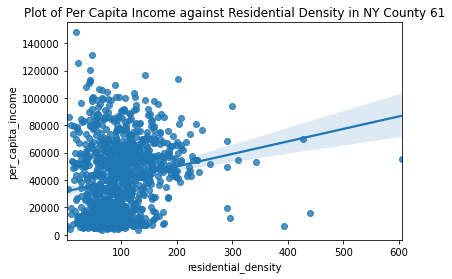

In [11]:
# Filter by State_County_ID 3661
data_ny_61 = pd.DataFrame(data[data["State_County_ID"]==3661])
#data_ny_61.sort_values("residential_density",ascending=False).head(25)
#data_ny_61_density = pd.DataFrame(data_ny_61[data_ny_61["residential_density"]<201])

# Scatter Plot
sns.regplot('residential_density','per_capita_income',data=data_ny_61)
plt.title('Plot of Per Capita Income against Residential Density in NY County 61')

In [ ]:
# Group by states for Typical Income and Housing Costs
states_grouped = pd.DataFrame(data.groupby('State')["per_capita_income"].mean())
states_grouped["Regional_Typical_Income"] = data.groupby('State')["hh_type1_income"].mean()
states_grouped["Regional_Typical_Housing_Costs"] = data.groupby('State')["hh_type1_h"].mean()
states_grouped["Regional_Typical_Transportation_Costs"] = data.groupby('State')["hh_type1_t"].mean()
states_grouped

,per_capita_income,Regional_Typical_Income,Regional_Typical_Housing_Costs,Regional_Typical_Transportation_Costs
State,,,,
Alabama,17685.530713,43413.024113,26.347803,26.478688
Alaska,27538.744207,70498.408108,25.301622,18.538041
Arizona,21522.816130,50894.981454,29.134342,21.738279
Arkansas,16937.668209,41065.782154,25.518600,27.631023
California,24466.754771,61803.111272,33.749898,18.075656
Colorado,25249.247485,57949.515685,28.265478,18.586296
Connecticut,29741.316206,68665.299145,29.975329,16.741561
Delaware,24586.146524,57233.450704,28.817041,19.588420
District of Columbia,33271.898460,85660.000000,22.372101,10.228369


In [ ]:
# Income by household profiles grouped by state
state_income_profiles = pd.DataFrame(data.groupby('State')["per_capita_income"].mean())
state_income_profiles["Regional_Typical_Income"] = data.groupby('State')["hh_type1_income"].mean()
state_income_profiles["Regional_Moderate_Income"] = data.groupby('State')["hh_type2_income"].mean()
state_income_profiles["Dual_Income"] = data.groupby('State')["hh_type3_income"].mean()
state_income_profiles["Low_Income"] = data.groupby('State')["hh_type4_income"].mean()
#state_income_profiles["Very_Low_Income"] = data.groupby('State')["hh_type5_income"].mean() # consistent for every state
state_income_profiles["Single_Professional_Income"] = data.groupby('State')["hh_type6_income"].mean()
state_income_profiles["Single_Worker_Income"] = data.groupby('State')["hh_type7_income"].mean()
state_income_profiles["Retirees_Income"] = data.groupby('State')["hh_type8_income"].mean()
state_income_profiles

,per_capita_income,Regional_Typical_Income,Regional_Moderate_Income,Dual_Income,Low_Income,Single_Professional_Income,Single_Worker_Income,Retirees_Income
State,,,,,,,,
Alabama,17685.530713,43413.024113,34730.419290,65119.536169,25286.738111,34427.064398,17213.532200,34730.419290
Alaska,27538.744207,70498.408108,56398.726486,105747.612162,36739.054054,53031.240999,26515.620500,56398.726486
Arizona,21522.816130,50894.981454,40715.985163,76342.472180,28219.147870,38707.889028,19353.944517,40715.985163
Arkansas,16937.668209,41065.782154,32852.625723,61598.673231,23403.907692,32646.074122,16323.037063,32852.625723
California,24466.754771,61803.111272,49442.489018,92704.666908,36025.923246,43164.915562,21582.457781,49442.489018
Colorado,25249.247485,57949.515685,46359.612548,86924.273528,33144.846351,46501.867325,23250.933662,46359.612548
Connecticut,29741.316206,68665.299145,54932.239316,102997.948718,42262.762238,54322.463888,27161.231942,54932.239316
Delaware,24586.146524,57233.450704,45786.760563,85850.176056,32088.820423,44448.213236,22224.106622,45786.760563
District of Columbia,33271.898460,85660.000000,68528.000000,128490.000000,46600.000000,64893.939390,32446.969700,68528.000000


Text(0.5, 1.0, 'Typical Household Income for Regions in each State')

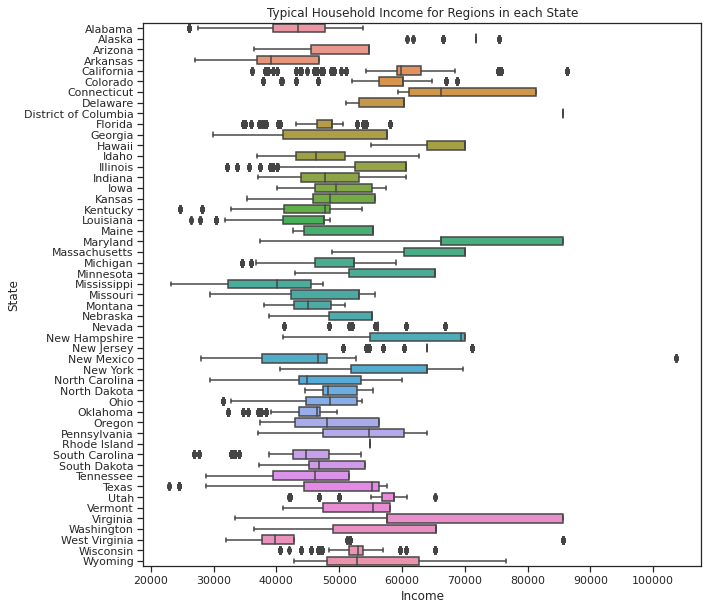

In [ ]:
# Boxplot of typical income for regions in each state
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize = (10,10))

sns.boxplot(x="hh_type1_income", y="State", data = data)

#sns.stripplot(x="hh_type1_income", y="State", data = data, size = 1, color=".3") #Add all observations

plt.xlabel("Income")
# sort y axis by income level
# add meanline
plt.title("Typical Household Income for Regions in each State")

In [ ]:
# Income profiles
income_profiles = pd.DataFrame(data["hh_type1_income"])
income_profiles = income_profiles.rename(columns={"hh_type1_income": "Regional_Typical_Income"})
income_profiles["Regional_Moderate_Income"]=data["hh_type2_income"]
income_profiles["Dual_Income"]=data["hh_type3_income"]
income_profiles["Low_Income"]=data["hh_type4_income"]
income_profiles["Single_Professional_Income"]=data["hh_type6_income"]
income_profiles["Single_Worker_Income"]=data["hh_type7_income"]
income_profiles["Retirees_Income"]=data["hh_type8_income"]

Text(0.5, 1.0, 'Income distribution of each profile')

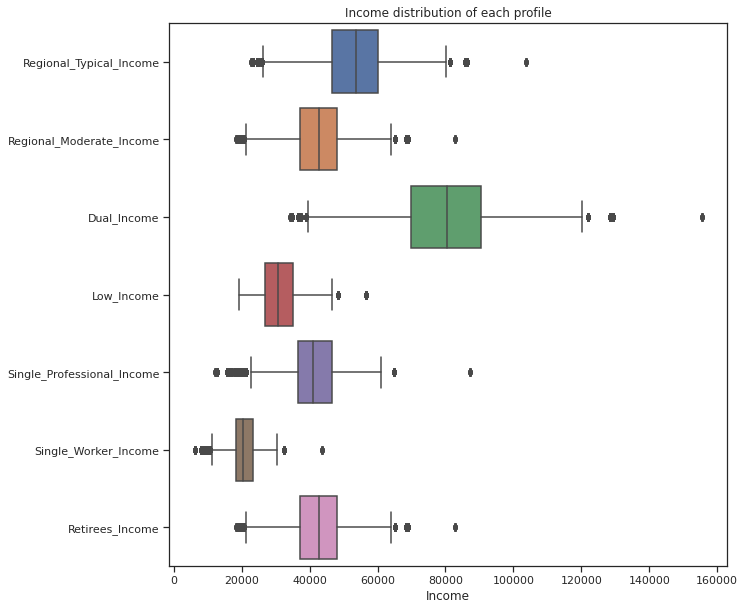

In [ ]:
# Boxplot of income profiles
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize = (10,10))

sns.boxplot(data = income_profiles, orient="h")

#sns.swarmplot(xdata = income_profiles, size = 1, color=".3") #Add all observations

plt.xlabel("Income")
# add meanline
plt.title("Income distribution of each profile")